### How this notebook is different

- Previous tutorial: Single linear (logistic regression) model with no hidden layers.  
- This notebook: Uses multiple layers with non-linear activations (feedforward neural network), so it can learn more complex patterns.  
- In short: Logistic regression is a simple linear classifier; this is a deeper non-linear model.


In [1]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [2]:
dataset = MNIST(root='/content/data/', download=True, transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 131MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 34.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 56.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.95MB/s]


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
from torch.utils.data import random_split

In [4]:
len(dataset)

60000

In [5]:
dataset[345]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

to show this we use plt.imshow but this uses h w c but we have cwh using to tensor method so we use permute method to permute the dimensions 

In [6]:
image,label = dataset[0]
image.shape

torch.Size([1, 28, 28])

In [7]:
image.permute(1,2,0).shape

torch.Size([28, 28, 1])

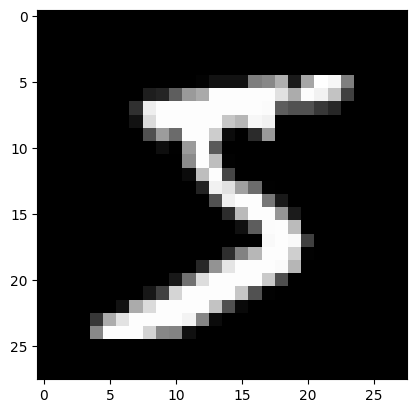

In [8]:
plt.imshow(image.permute(1,2,0),cmap="gray")

next lets use the random_split function to set aside 10k images for out validation set

In [9]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds , val_ds = random_split(dataset , [train_size,val_size])
len(train_ds) , len(val_ds)

(50000, 10000)

In [10]:
batch_size = 128

train_loader = DataLoader(train_ds,batch_size,shuffle = True,num_workers=4,pin_memory=True)
val_loader = DataLoader(val_ds,batch_size*2,num_workers = 4 , pin_memory = True)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


lets visualize a batch of data in a grind using the make_grid function from torchvisoin we will also use the .permute method on the tensor to move the channels to the last dimension as expected by matplotlib

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


images.shape torch.Size([128, 1, 28, 28])


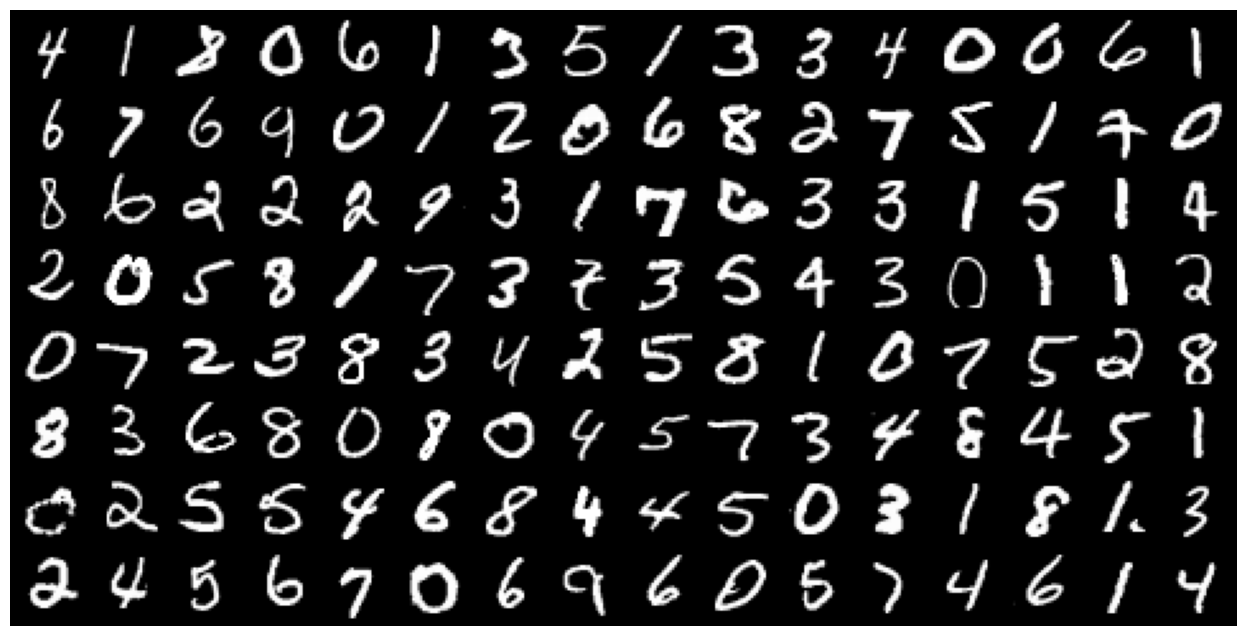

In [11]:
for images , _ in train_loader:
    print('images.shape',images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

this time we will have 2 layers with activation function , first lets create a batch of input tensors we will flateen the 1x28x28 images into vectors of size 784 so they can be passed inot an nn.Linear object

In [12]:
for images , labels in train_loader:
    print('images.shape',images.shape)
    inputs = images.reshape(128,784)
    print('inputs.shape',inputs.shape)
    break

images.shape torch.Size([128, 1, 28, 28])
inputs.shape torch.Size([128, 784])


In [13]:
input_size = inputs.shape[-1]
hidden_size = 32


here we choose the size of hidden layer to be 32

In [14]:
layer1  = nn.Linear(input_size,hidden_size)

In [15]:
layer1_outputs = layer1(inputs)
print("layer1_outputs.shape",layer1_outputs.shape)

layer1_outputs.shape torch.Size([128, 32])


now for non linearisatoin we will use relu 

In [16]:
relu_outputs = F.relu(layer1_outputs)

In [17]:
relu_outputs

tensor([[0.0480, 0.0000, 0.0000,  ..., 0.2079, 0.5826, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3439, 0.0000, 0.0000,  ..., 0.1588, 0.2916, 0.0000],
        ...,
        [0.0812, 0.0000, 0.0000,  ..., 0.0000, 0.4775, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0204, 0.2920, 0.0232],
        [0.0362, 0.0000, 0.0000,  ..., 0.2529, 0.2734, 0.0000]],
       grad_fn=<ReluBackward0>)

In [18]:
output_size = 10
layer2 = nn.Linear(hidden_size,output_size)

In [19]:
layer2_outputs = layer2(relu_outputs)


In [20]:
layer2_outputs.shape

torch.Size([128, 10])